In [5]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'20',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '51f0d562-3bb5-4476-9025-cfd5eb219558',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2024-05-16T13:23:04.002Z', 'error_code': 0, 'error_message': None, 'elapsed': 30, 'credit_count': 1, 'notice': None, 'total_count': 9955}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 11046, 'date_added': '2010-07-13T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'para

In [50]:
import pandas as pd

pd.set_option('display.max_columns', None)

In [7]:
# Normalize data in the dataFrame to be readable 
df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19699081.00000,19699081.00000,...,54.66590,1383333944261.95996,None,2024-05-16T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
1,1027,Ethereum,ETH,ethereum,8936,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120118410.45756,120118410.45756,...,15.07780,357450419618.33002,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
2,825,Tether USDt,USDT,tether,85669,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110952273350.24437,113086550454.89250,...,4.68120,113113500544.62000,None,2024-05-16T13:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-16 15:23:13.071705
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586538.19133,147586538.19133,...,3.58170,84911217345.45000,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448774517.30127,576172242.66529,...,3.04630,92719772756.21001,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
5,3408,USDC,USDC,usd-coin,19144,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33317098247.52639,33317098247.52639,...,1.40530,33316537036.08000,None,2024-05-16T13:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-16 15:23:13.071705
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,...,1.20240,51557642733.43000,None,2024-05-16T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
7,11419,Toncoin,TON,toncoin,326,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474189298.04266,5106672325.74965,...,0.97800,34079624062.60000,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144314746383.70526,144314746383.70526,...,0.92840,22037883585.16000,None,2024-05-16T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
9,2010,Cardano,ADA,cardano,1170,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35670881072.87800,36883631806.18200,...,0.67930,20342841463.04000,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705


In [ ]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com./v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'20',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '51f0d562-3bb5-4476-9025-cfd5eb219558',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    
    
    
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2, ignore_index=True)
    

In [ ]:
import os
from time import time
from time import sleep
import pandas as pd

# Initialize an empty DataFrame
df = pd.DataFrame()

for i in range(333):
    api_runner()
    print('Hit')
    sleep(60)
exit()

In [ ]:
import requests
import pandas as pd
from time import sleep

def fetch_cryptocurrency_data(api_key, limit=20, convert='USD', interval=60, iterations=333):
    global df
    """
    Fetch cryptocurrency data from the CoinMarketCap API periodically and update DataFrame.

    Parameters:
    - api_key (str): Your CoinMarketCap API key.
    - limit (int): Number of cryptocurrencies to retrieve (default: 20).
    - convert (str): Currency to convert cryptocurrency prices into (default: 'USD').
    - interval (int): Time interval between API calls in seconds (default: 60 seconds).
    - iterations (int): Number of iterations (API calls) to make (default: 333).

    Returns:
    - DataFrame: Updated DataFrame containing cryptocurrency data.
    """
    # Initialize an empty DataFrame
    df = pd.DataFrame()

    # API endpoint URL
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'

    # Request parameters
    params = {
        'start': '1',
        'limit': limit,
        'convert': convert
    }

    # Request headers
    headers = {
        'Accepts': 'application/json',
        'X-CMC_PRO_API_KEY': api_key
    }

    # Loop to make API calls periodically
    for _ in range(iterations):
        # Make API request
        response = requests.get(url, params=params, headers=headers)

        # Check if request was successful
        if response.status_code == 200:
            # Normalize JSON response into DataFrame
            data = response.json()
            df_temp = pd.json_normalize(data['data'])

            # Add timestamp column with current datetime
            df_temp['timestamp'] = pd.to_datetime('now')

            # Append data to DataFrame
            df = df.append(df_temp, ignore_index=True)

            print('Data fetched successfully.')

        else:
            print('Error: Failed to fetch data from API.')

        # Sleep for specified interval before making next API call
        sleep(interval)

    return df

# Example usage:
api_key = '51f0d562-3bb5-4476-9025-cfd5eb219558'  # Replace 'YOUR_API_KEY' with your actual API key
df = fetch_cryptocurrency_data(api_key)
print(df)


In [3]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [8]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,11046,2010-07-13T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19699081.00000,19699081.00000,...,54.66590,1383333944261.95996,None,2024-05-16T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
1,1027,Ethereum,ETH,ethereum,8936,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,120118410.45756,120118410.45756,...,15.07780,357450419618.33002,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
2,825,Tether USDt,USDT,tether,85669,2015-02-25T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, avalanch...",NaN,110952273350.24437,113086550454.89250,...,4.68120,113113500544.62000,None,2024-05-16T13:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2024-05-16 15:23:13.071705
3,1839,BNB,BNB,bnb,2162,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",NaN,147586538.19133,147586538.19133,...,3.58170,84911217345.45000,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
4,5426,Solana,SOL,solana,660,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,448774517.30127,576172242.66529,...,3.04630,92719772756.21001,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
5,3408,USDC,USDC,usd-coin,19144,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,33317098247.52639,33317098247.52639,...,1.40530,33316537036.08000,None,2024-05-16T13:21:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2024-05-16 15:23:13.071705
6,52,XRP,XRP,xrp,1316,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",100000000000.00000,55359176420.00000,99987633657.00000,...,1.20240,51557642733.43000,None,2024-05-16T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
7,11419,Toncoin,TON,toncoin,326,2021-08-26T13:40:22.000Z,"[pos, layer-1, ftx-bankruptcy-estate, dwf-labs...",NaN,3474189298.04266,5106672325.74965,...,0.97800,34079624062.60000,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
8,74,Dogecoin,DOGE,dogecoin,965,2013-12-15T00:00:00.000Z,"[mineable, pow, scrypt, medium-of-exchange, me...",NaN,144314746383.70526,144314746383.70526,...,0.92840,22037883585.16000,None,2024-05-16T13:22:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705
9,2010,Cardano,ADA,cardano,1170,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",45000000000.00000,35670881072.87800,36883631806.18200,...,0.67930,20342841463.04000,None,2024-05-16T13:21:00.000Z,NaN,NaN,NaN,NaN,NaN,2024-05-16 15:23:13.071705


In [35]:
type(df1)

pandas.core.series.Series

In [45]:
df1 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d', 'quote.USD.percent_change_30d']].mean()
df1

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d
name,,,,
Bitcoin,-0.57782,3.38710,7.29936,4.46238
Ethereum,-0.67398,1.06147,-0.39291,-3.56792
Tether USDt,-0.02080,-0.00017,0.06581,-0.02434
BNB,-0.85576,-0.08858,-3.20058,6.76139
Solana,-1.06252,7.49239,11.57552,21.41378
USDC,-0.02926,-0.02985,0.00291,-0.02509
XRP,-0.33063,1.95082,0.24658,5.57556
Toncoin,3.89762,-4.10679,9.84326,8.44674
Dogecoin,-1.15508,0.82446,3.64045,-0.77467


In [57]:
df3 = df1
df3 = df3.stack()
df3

name                                           
Bitcoin            quote.USD.percent_change_1h    -0.57782
                   quote.USD.percent_change_24h    3.38710
                   quote.USD.percent_change_7d     7.29936
                   quote.USD.percent_change_30d    4.46238
Ethereum           quote.USD.percent_change_1h    -0.67398
                                                    ...   
Litecoin           quote.USD.percent_change_30d    4.29747
Internet Computer  quote.USD.percent_change_1h    -0.75673
                   quote.USD.percent_change_24h    0.49581
                   quote.USD.percent_change_7d     1.47549
                   quote.USD.percent_change_30d    1.35609
Length: 80, dtype: float64

In [59]:
type(df4)

pandas.core.frame.DataFrame

In [58]:
# Converting a dataFrame to a Series
df4 = df3.to_frame(name='values')
df4

values
name                                                   
Bitcoin           quote.USD.percent_change_1h  -0.57782
                  quote.USD.percent_change_24h  3.38710
                  quote.USD.percent_change_7d   7.29936
                  quote.USD.percent_change_30d  4.46238
Ethereum          quote.USD.percent_change_1h  -0.67398
...                                                 ...
Litecoin          quote.USD.percent_change_30d  4.29747
Internet Computer quote.USD.percent_change_1h  -0.75673
                  quote.USD.percent_change_24h  0.49581
                  quote.USD.percent_change_7d   1.47549
                  quote.USD.percent_change_30d  1.35609

[80 rows x 1 columns]

In [61]:
# Adding an index to a DF

index = pd.Index(range(80))

df5 = df4.reset_index()
df5

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,-0.57782
1,Bitcoin,quote.USD.percent_change_24h,3.38710
2,Bitcoin,quote.USD.percent_change_7d,7.29936
3,Bitcoin,quote.USD.percent_change_30d,4.46238
4,Ethereum,quote.USD.percent_change_1h,-0.67398
...,...,...,...
75,Litecoin,quote.USD.percent_change_30d,4.29747
76,Internet Computer,quote.USD.percent_change_1h,-0.75673
77,Internet Computer,quote.USD.percent_change_24h,0.49581
78,Internet Computer,quote.USD.percent_change_7d,1.47549


In [63]:
df5 = df5.rename(columns={'level_1': '%_change'})
df5

,name,%_change,values
0,Bitcoin,quote.USD.percent_change_1h,-0.57782
1,Bitcoin,quote.USD.percent_change_24h,3.38710
2,Bitcoin,quote.USD.percent_change_7d,7.29936
3,Bitcoin,quote.USD.percent_change_30d,4.46238
4,Ethereum,quote.USD.percent_change_1h,-0.67398
...,...,...,...
75,Litecoin,quote.USD.percent_change_30d,4.29747
76,Internet Computer,quote.USD.percent_change_1h,-0.75673
77,Internet Computer,quote.USD.percent_change_24h,0.49581
78,Internet Computer,quote.USD.percent_change_7d,1.47549


In [74]:
df5['%_change'] = df5['%_change'].replace(['quote.USD.percent_change_1h'], ['in 1h'])
df5['%_change'] = df5['%_change'].replace(['quote.USD.percent_change_24h'], ['in 24h'])
df5['%_change'] = df5['%_change'].replace(['quote.USD.percent_change_7d'], ['in 7d'])
df5['%_change'] = df5['%_change'].replace(['quote.USD.percent_change_30d'], ['in_30d'])
df5

,name,%_change,values
0,Bitcoin,1h,-0.57782
1,Bitcoin,24h,3.38710
2,Bitcoin,7d,7.29936
3,Bitcoin,30d,4.46238
4,Ethereum,1h,-0.67398
...,...,...,...
75,Litecoin,30d,4.29747
76,Internet Computer,1h,-0.75673
77,Internet Computer,24h,0.49581
78,Internet Computer,7d,1.47549


In [64]:
import seaborn as sns
import matplotlib.pyplot as plt

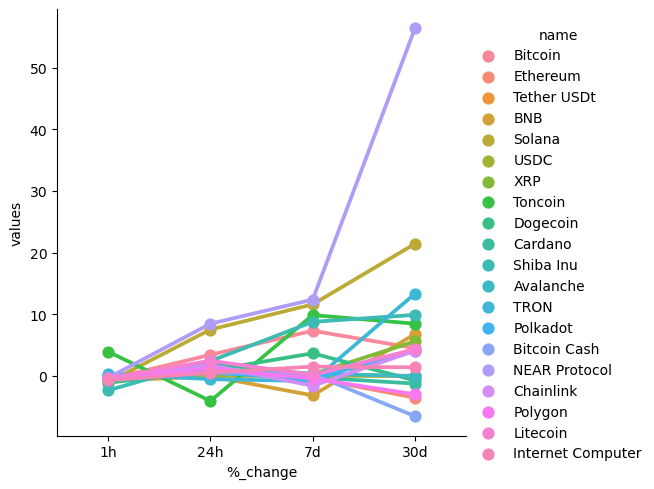

In [70]:
sns.catplot(x='%_change', y='values', hue='name', data=df5, kind='point')

In [81]:
df6 = df[['name','quote.USD.price','timestamp']]
df6 = df6.query("name == 'Bitcoin'")
df6

,name,quote.USD.price,timestamp
0,Bitcoin,65873.04496,2024-05-16 15:23:13.071705
